# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [64]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

## Lectura de los datos

In [66]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("ECG_respiracion10.txt", delimiter="\t")
array1

array([[  0.,   0.,   0., ...,   0., 553.,  nan],
       [  1.,   0.,   0., ...,   0., 537.,  nan],
       [  2.,   0.,   0., ...,   0., 520.,  nan],
       ...,
       [  7.,   0.,   0., ...,   0., 522.,  nan],
       [  8.,   0.,   0., ...,   0., 518.,  nan],
       [  9.,   0.,   0., ...,   0., 520.,  nan]])

In [67]:
#Nos quedamos con el dato del sensor
d_sensor = array1[:,-2]
d_sensor

array([553., 537., 520., ..., 522., 518., 520.])

## Graficación de los datos

(0.0, 5000.0)

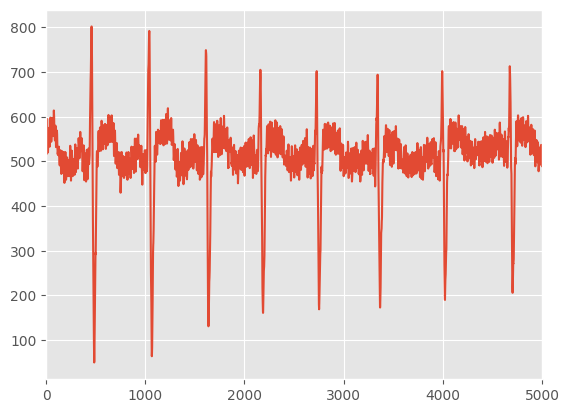

In [68]:
plt.plot(d_sensor)
plt.xlim(0,5000)

## Especificar la Frecuencia de muestreo 

In [69]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n = np.arange(0,d_sensor.shape[0])  # t = n*Ts
t = n*Ts

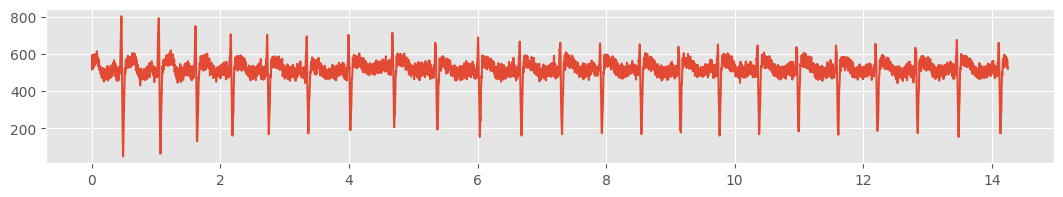

In [70]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, d_sensor)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [71]:
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)

In [72]:
#Creamos el data frame con las varibles t y d_sensor
df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
df.head()

,t,d_sensor
0,0.000,553.0
1,0.001,537.0
2,0.002,520.0
3,0.003,516.0
4,0.004,528.0


In [73]:
#Establecemos t como index 
df = df.set_index("t")
df.head()

,d_sensor
t,
0.000,553.0
0.001,537.0
0.002,520.0
0.003,516.0
0.004,528.0


14250


(0.0, 0.619)

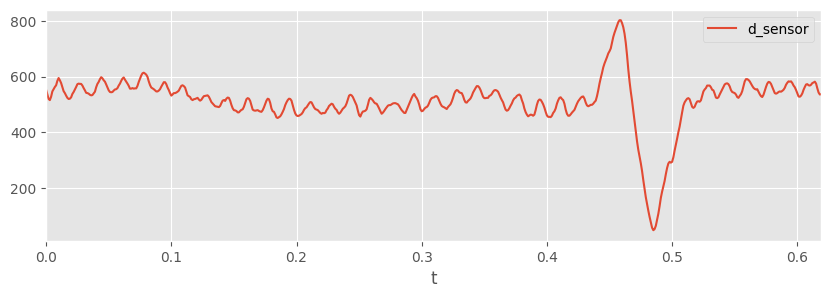

In [74]:
#Ploteamos la señal

df.plot(figsize=(10,3))
print(len(df))
plt.xlim(0,0.619)
#####plt.plot(df.index, df.loc[936])#######

## Pasando a data tabular estilo Sklearn

In [75]:
df.index.max()/0.619

23.01938610662359

In [76]:
df.shape[0]/23

619.5652173913044

In [77]:
d_obs = df["d_sensor"].values[:14237].reshape(23,619)
d_obs

array([[553., 537., 520., ..., 558., 543., 536.],
       [537., 540., 544., ..., 551., 549., 554.],
       [567., 575., 582., ..., 522., 523., 525.],
       ...,
       [549., 540., 534., ..., 529., 522., 518.],
       [522., 531., 538., ..., 530., 533., 543.],
       [549., 551., 560., ..., 536., 540., 545.]])

<Figure size 1300x200 with 0 Axes>

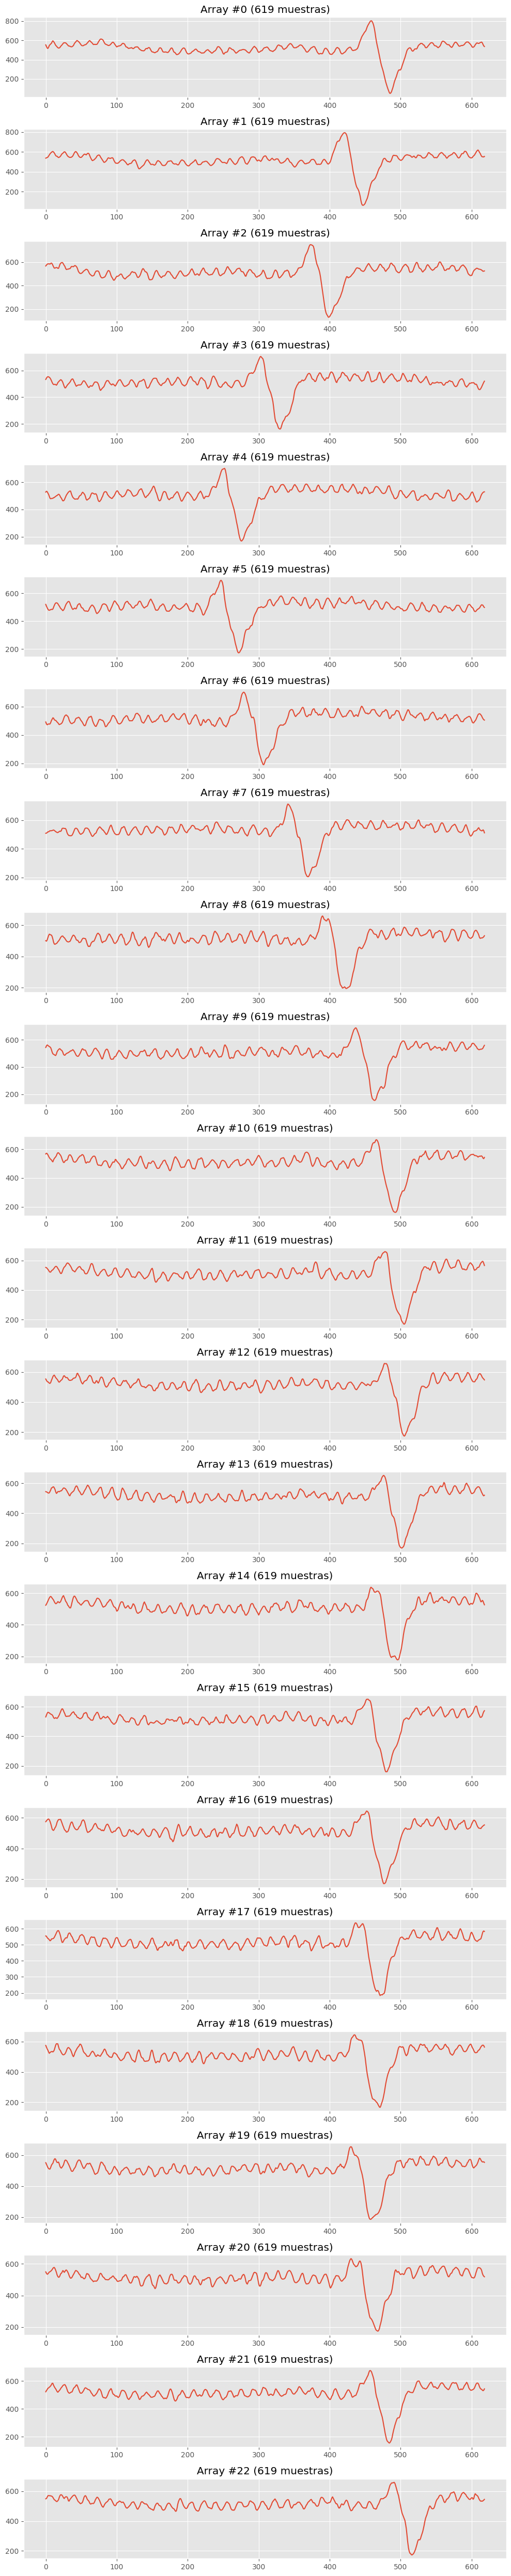

(23, 619)

In [78]:
plt.figure(figsize=(13,2))
#plt.plot(d_obs[])

fig, axs = plt.subplots(nrows=23, figsize=(10, 50))

for i in range(23):
    axs[i].plot(d_obs[i])
    axs[i].set_title(f"Array #{i} (619 muestras)")
    
plt.tight_layout()
plt.show()
d_obs.shape

In [79]:
# Tamaño requerido para los subarrays
tamano_subarray = 680

# Agregar ceros al final de los subarrays en array1 y array2
d_obs = np.concatenate((d_obs, np.zeros((23, tamano_subarray - d_obs.shape[1]))), axis=1)
d_obs


array([[553., 537., 520., ...,   0.,   0.,   0.],
       [537., 540., 544., ...,   0.,   0.,   0.],
       [567., 575., 582., ...,   0.,   0.,   0.],
       ...,
       [549., 540., 534., ...,   0.,   0.,   0.],
       [522., 531., 538., ...,   0.,   0.,   0.],
       [549., 551., 560., ...,   0.,   0.,   0.]])

In [80]:
len(d_obs[1])

680

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |


In [81]:
#array4 = np.concatenate((array3,  np.repeat(0, array3.shape[0]).reshape(-1,1)), axis=1)

# Creamos una categoría
target_1 = np.repeat(1, d_obs.shape[0])
target_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [82]:
ecg_resp = {"base": d_obs, "target": target_1}
ecg_resp

{'base': array([[553., 537., 520., ...,   0.,   0.,   0.],
        [537., 540., 544., ...,   0.,   0.,   0.],
        [567., 575., 582., ...,   0.,   0.,   0.],
        ...,
        [549., 540., 534., ...,   0.,   0.,   0.],
        [522., 531., 538., ...,   0.,   0.,   0.],
        [549., 551., 560., ...,   0.,   0.,   0.]]),
 'target': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1])}